In [1]:
import pandas
import pathlib
from matplotlib import pyplot as plt
from config import datadir

import scipy.optimize
import numpy
from tbcontrol.responses import fopdt, sopdt

In [2]:
excel_directory = pandas.read_excel(datadir/'Data Description.xlsx', parse_dates=True, index_col='Start Date') #Loads complete excel directory used to organise datasets
excel_directory

,End Date,Equipment,Type,Purpose,Filename,Run,Description
Start Date,,,,,,,
2019-12-06,2019-12-11,pH Probe,Raw,Test Drift on pH probe,20191206 pH Drift 1.txt,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Raw,Test Drift on pH probe,20191211 pH Drift 2.txt,2,"long run of pH probe drift, performed inside t..."
2019-12-17,2019-12-23,pH Probe,Raw,Test Drift on pH probe,20191217 pH Drift 3.txt,3,"long run of pH probe Drift, circulating ph7 bu..."
2020-01-16,2020-01-16,pH Probe,Raw,Step Test,20200116 pH Step 3.txt,3,pH stepped outside of rig
2020-01-14,2020-01-14,pH Probe,Raw,Step Test,20200114 pH Step 1.broken,1,"pH stepped outside of rig. Probe Broke, Dump run"
2020-01-15,2020-01-15,pH Probe,Raw,Step Test,20200115 pH Step 2.txt,2,pH stepped outside of rig
2020-01-01,2020-01-01,Pumps,Calibration,Calibration,Pump Calibration.xlsx,1,Calibration data for all pumps
2019-12-06,2019-12-11,pH Probe,Drift,Test Drift on pH probe,20191206 pH Drift 1.csv,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Drift,Test Drift on pH probe,20191211 pH Drift 2.csv,2,"long run of pH probe drift, performed inside t..."


In [3]:
steps = excel_directory[(excel_directory['Type']=='Step Test')]    # Creates a new directory of only the raw data files to be cleaned 
                                                            # Use '&' for multiple conditions

In [4]:
external_steps = pandas.read_csv(datadir /'20200115 pH Step 2.csv')
external_steps

,DateTime,Temp,pH
0,2020-01-15 11:59:11,293.801689,7.074204
1,2020-01-15 11:59:12,293.802309,7.074330
2,2020-01-15 11:59:13,293.802142,7.075654
3,2020-01-15 11:59:14,293.801788,7.079847
4,2020-01-15 11:59:15,293.802407,7.082653
...,...,...,...
90683,2020-01-16 13:10:34,293.048022,13.038681
90684,2020-01-16 13:10:35,293.048218,13.038362
90685,2020-01-16 13:10:36,293.048454,13.038238
90686,2020-01-16 13:10:37,293.047766,13.038757


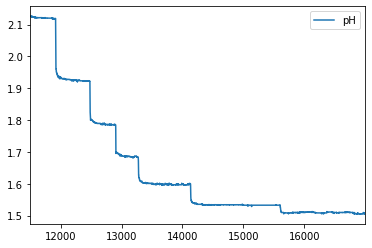

In [5]:
external_steps[11500:17000].plot(y='pH')

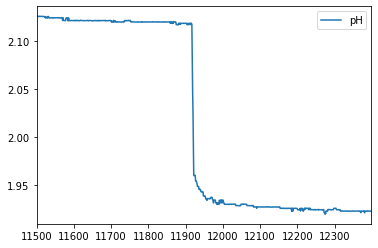

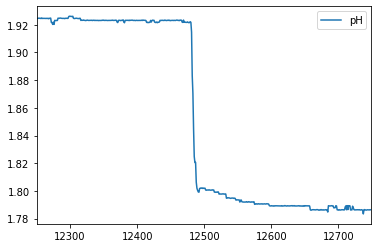

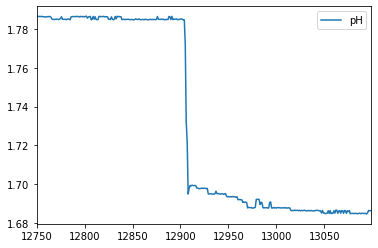

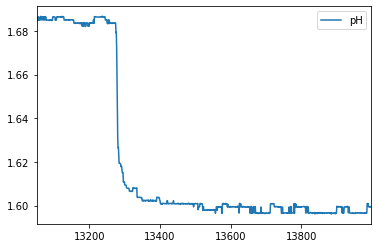

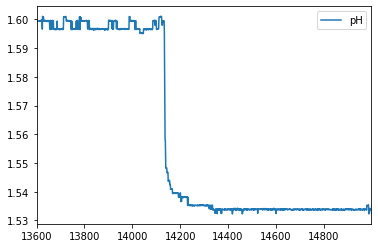

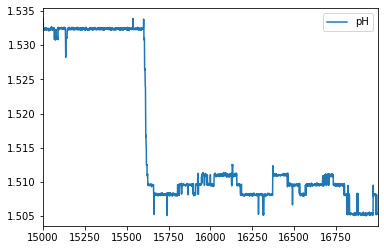

In [6]:
spans=[[11500,12400],[12250,12750],[12750,13100],[13050,14000],[13600,15000],[15000,17000]]

for period in spans:
    external_steps[period[0]:period[1]].plot(y = 'pH')

[-47.51558348996765, 3.9245115484007216, 416.7847423809808, 132.19832295315183]
[-22.06934478782457, 3.5833158666194116, 230.64373087940936, 83.82484808836983]
[-12.103347451313674, 1.7880467859392282, 154.646691630107, 61.009306944793494]
[-8.651484745140106, 9.414716484588967, 223.6722030261576, 48.40906075562464]
[-5.3814929790757295, 7.448528558137824, 532.2112228407333, 39.615570587330254]
[-1.7856519986411712, 8.118771908121692, 605.8787891143822, 34.0670064614201]


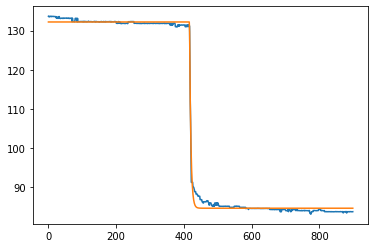

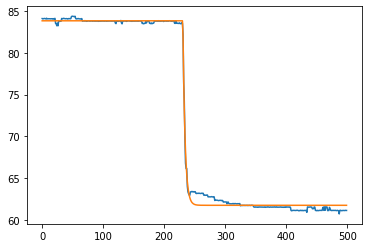

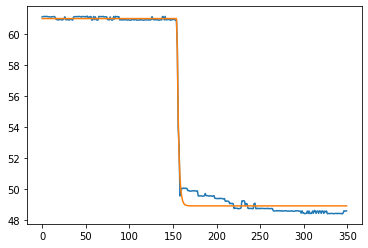

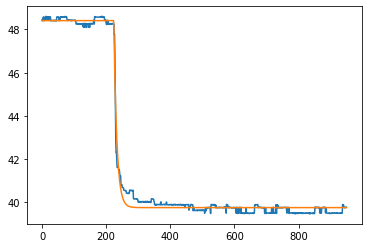

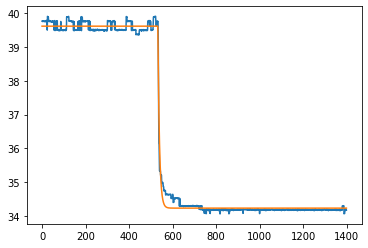

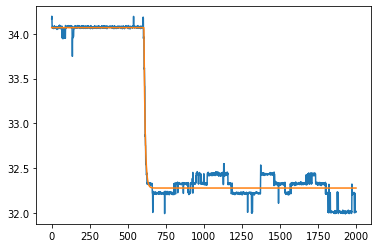

In [12]:
ph_list = []
ph_delogged = []
time_list = []
for span in spans:
    lower = span[0]
    upper = span[1]
    
    time_set = numpy.array(external_steps['DateTime'][lower:upper].index.tolist())-lower
    ph_set = numpy.array(external_steps['pH'][lower:upper].values)
    ph_delogged_set = 10**numpy.array(external_steps['pH'][lower:upper].values)
    
    time_list.append(time_set)
    ph_list.append(ph_set)
    ph_delogged.append(ph_delogged_set)
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, time_set, 
                                                      ph_delogged_set, [-2, 4, 200, 50])

    print([K, tau, theta, y0])
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
# #     plt.plot(h.t, h.logdict['T1'])
#     plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))

    figure = plt.figure()
    plt.plot(time_set, ph_delogged_set)
    plt.plot(fopdt(time_set, K, tau, theta, y0))

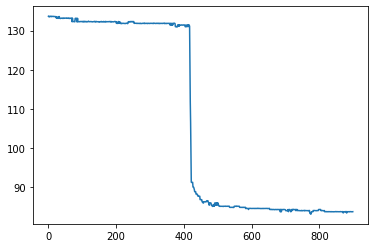

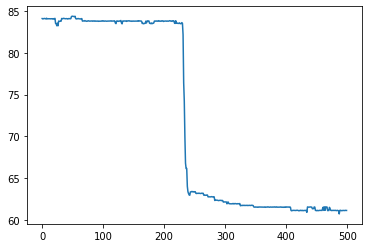

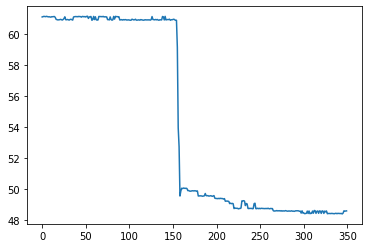

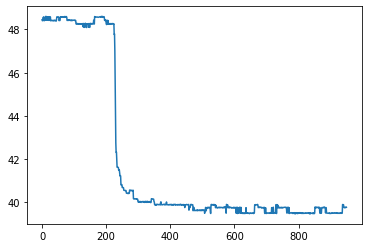

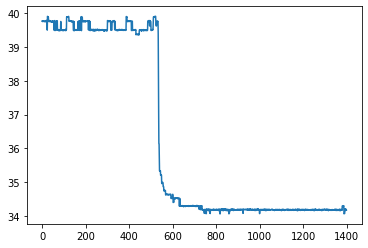

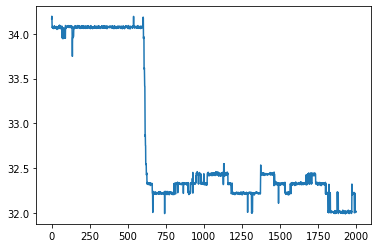

In [8]:
for time, ph in zip(time_list, ph_delogged):
    figure = plt.figure()
    plt.plot(time, ph)
    plt.plot(fopdt(time))